## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [1]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.14.0


## Split Dataset to Train, Test and Validation

In [3]:
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH

In [4]:
# try:
#     base_dir = ''
#     fruit_dir = make_dir(os.path.join(base_dir, 'rice_leaf_disease'))
#     train_dir = make_dir(os.path.join(fruit_dir, 'train'))
#     validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
#     test_dir = make_dir(os.path.join(fruit_dir, 'test'))
#     preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

#     train_Bacterialblight_dir = make_dir(os.path.join(train_dir, 'Bacterialblight'))
#     train_Brownspot_dir = make_dir(os.path.join(train_dir, 'Brownspot'))
#     train_Leafsmut_dir = make_dir(os.path.join(train_dir, 'Leafsmut'))


#     validation_Bacterialblight_dir = make_dir(os.path.join(validation_dir, 'Bacterialblight'))
#     validation_Brownspot_dir = make_dir(os.path.join(validation_dir, 'Brownspot'))
#     validation_Leafsmut_dir = make_dir(os.path.join(validation_dir, 'Leafsmut'))


#     test_Bacterialblight_dir = make_dir(os.path.join(test_dir, 'Bacterialblight'))
#     test_Brownspot_dir = make_dir(os.path.join(test_dir, 'Brownspot'))
#     test_Leafsmut_dir = make_dir(os.path.join(test_dir, 'Leafsmut'))


# except OSError:
#     print("eror")

In [5]:
dataset_train_dir = 'rice_leaf_disease/train'
dataset_test_dir = 'rice_leaf_disease/test'
preview_dir = "rice_leaf_disease/preview"
validation_dir= "rice_leaf_disease/val"


Bacterialblight_train_dir = os.path.join(dataset_train_dir, 'Bacterialblight')
Brownspot_train_dir = os.path.join(dataset_train_dir, 'Brownspot')
Leafsmut_train_dir = os.path.join(dataset_train_dir, 'Leafsmut')


Bacterialblight_test_dir = os.path.join(dataset_test_dir, 'Bacterialblight')
Brownspot_test_dir = os.path.join(dataset_test_dir, 'Brownspot')
Leafsmut_test_dir = os.path.join(dataset_test_dir, 'Leafsmut')


print('Bacterialblight_train_dir images = ', len(os.listdir(Bacterialblight_train_dir)))
print('Brownspot_train_dir images = ', len(os.listdir(Brownspot_train_dir)))
print('Leafsmut_train_dir images = ', len(os.listdir(Leafsmut_train_dir)))

print()
print('Bacterialblight_test_dir images = ', len(os.listdir(Bacterialblight_test_dir)))
print('Brownspot_test_dir images = ', len(os.listdir(Brownspot_test_dir)))
print('Leafsmut_test_dir images = ', len(os.listdir(Leafsmut_test_dir)))


Bacterialblight_train_dir images =  1268
Brownspot_train_dir images =  1288
Leafsmut_train_dir images =  1155

Bacterialblight_test_dir images =  158
Brownspot_test_dir images =  161
Leafsmut_test_dir images =  146


In [6]:
print(len(os.listdir('rice_leaf_disease/train/Bacterialblight/')))
print(len(os.listdir('rice_leaf_disease/train/Brownspot/')))
print(len(os.listdir('rice_leaf_disease/train/Leafsmut/')))

print()
print(len(os.listdir('rice_leaf_disease/val/Bacterialblight/')))
print(len(os.listdir('rice_leaf_disease/val/Brownspot/')))
print(len(os.listdir('rice_leaf_disease/val/Leafsmut/')))

print()
print(len(os.listdir('rice_leaf_disease/test/Bacterialblight/')))
print(len(os.listdir('rice_leaf_disease/test/Brownspot/')))
print(len(os.listdir('rice_leaf_disease/test/Leafsmut/')))


1268
1288
1155

158
161
146

158
161
146


## Augmentation

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.3],
    channel_shift_range=20
)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     rotation_range=20,
#     horizontal_flip=True,
#     vertical_flip=True,
#     brightness_range=[0.5, 1.3],
#     channel_shift_range=20
# )

validation_datagen = ImageDataGenerator(rescale=1./255)

## Preview Augmentation

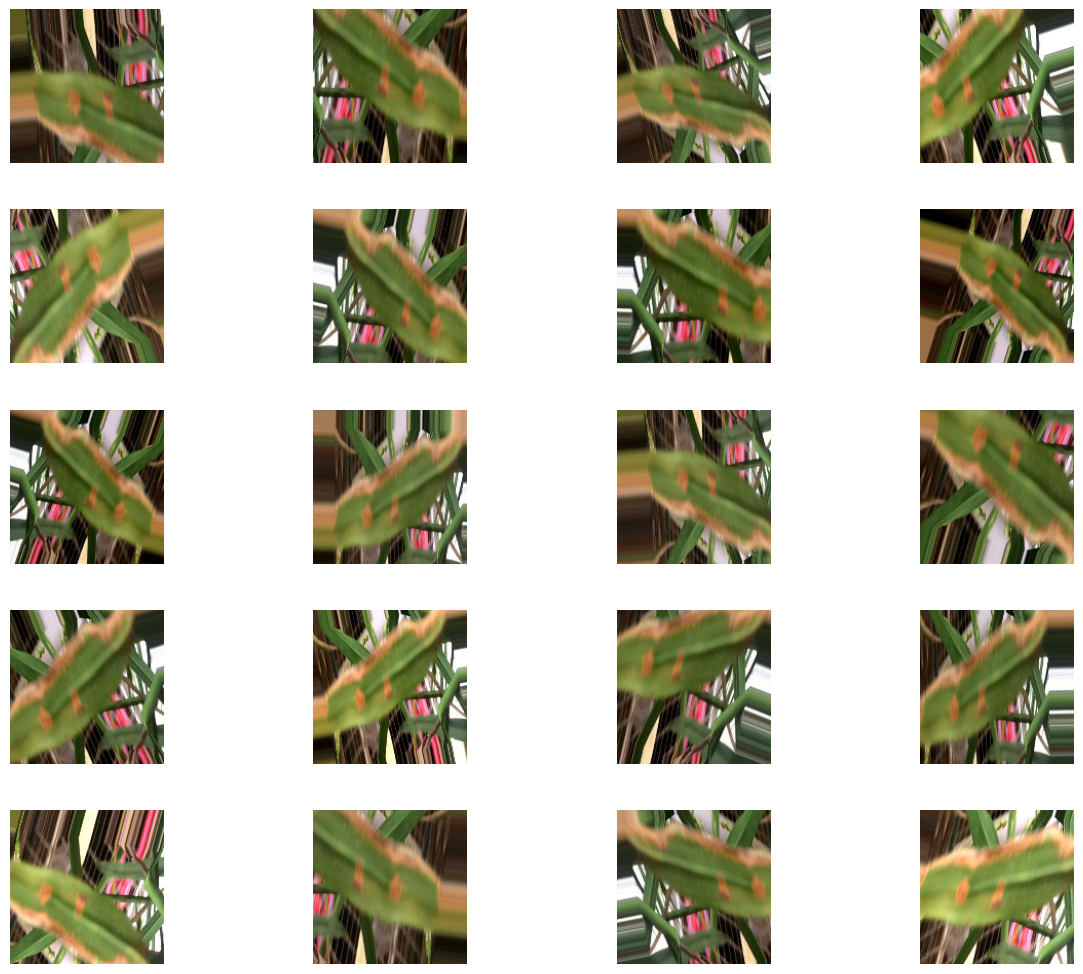

In [8]:
path_aug = "/Users/vashu/Downloads/Bennett_3rd year/CSET 225 AI /project/Archive/rice_leaf_disease/train/Bacterialblight/BACTERAILBLIGHT3_072.jpg"
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot(int((len(preview_img)/4)+1), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

## Image Data Generator

In [9]:
train_generator = train_datagen.flow_from_directory(dataset_train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(256,256), #?
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(256,256), #?
                                                         class_mode='categorical')

Found 3711 images belonging to 3 classes.
Found 465 images belonging to 3 classes.


## Callbacks

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy. Stop Training")
            self.model.stop_training = True

callbacks = myCallback()

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Sequential Model (Baseline)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

model = Sequential([
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(3, activation='softmax')
])
    
    


# #if you want to use tranfer learning, skip this cell
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

2023-10-31 16:37:48.333450: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-31 16:37:48.333487: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-31 16:37:48.333505: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-31 16:37:48.333737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-31 16:37:48.333768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# # #if you want to use tranfer learning, skip this cell
# model = tf.keras.models.Sequential([
#     Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(3, activation='softmax')
# ])

# # model.compile(optimizer='adam',
# #               loss='categorical_crossentropy',
# #               metrics=['accuracy'])

# # model.summary()



# # model = Sequential([
# #     Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
# #     MaxPooling2D(2, 2),
# #     Conv2D(128, (3, 3), activation='relu'),
# #     MaxPooling2D(2, 2),
# #     Conv2D(256, (3, 3), activation='relu'),
# #     MaxPooling2D(2, 2),
# #     Flatten(),
# #     Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
# #     Dropout(0.3),
# #     Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
# #     Dropout(0.3),
# #     Dense(3, activation='softmax')
# # ])

In [14]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 252, 252, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                        

In [9]:
train_len = 0
for foldername in os.listdir('rice_leaf_disease/train'):
    train_len = train_len + len(os.listdir(os.path.join('rice_leaf_disease/train',foldername)))

val_len = 0
for foldername in os.listdir('rice_leaf_disease/val'):
    val_len = val_len + len(os.listdir(os.path.join('rice_leaf_disease/val',foldername)))

print(train_len)

print(val_len)

NotADirectoryError: [Errno 20] Not a directory: 'rice_leaf_disease/train/.DS_Store'

ValueError: Could not save to JPEG for display

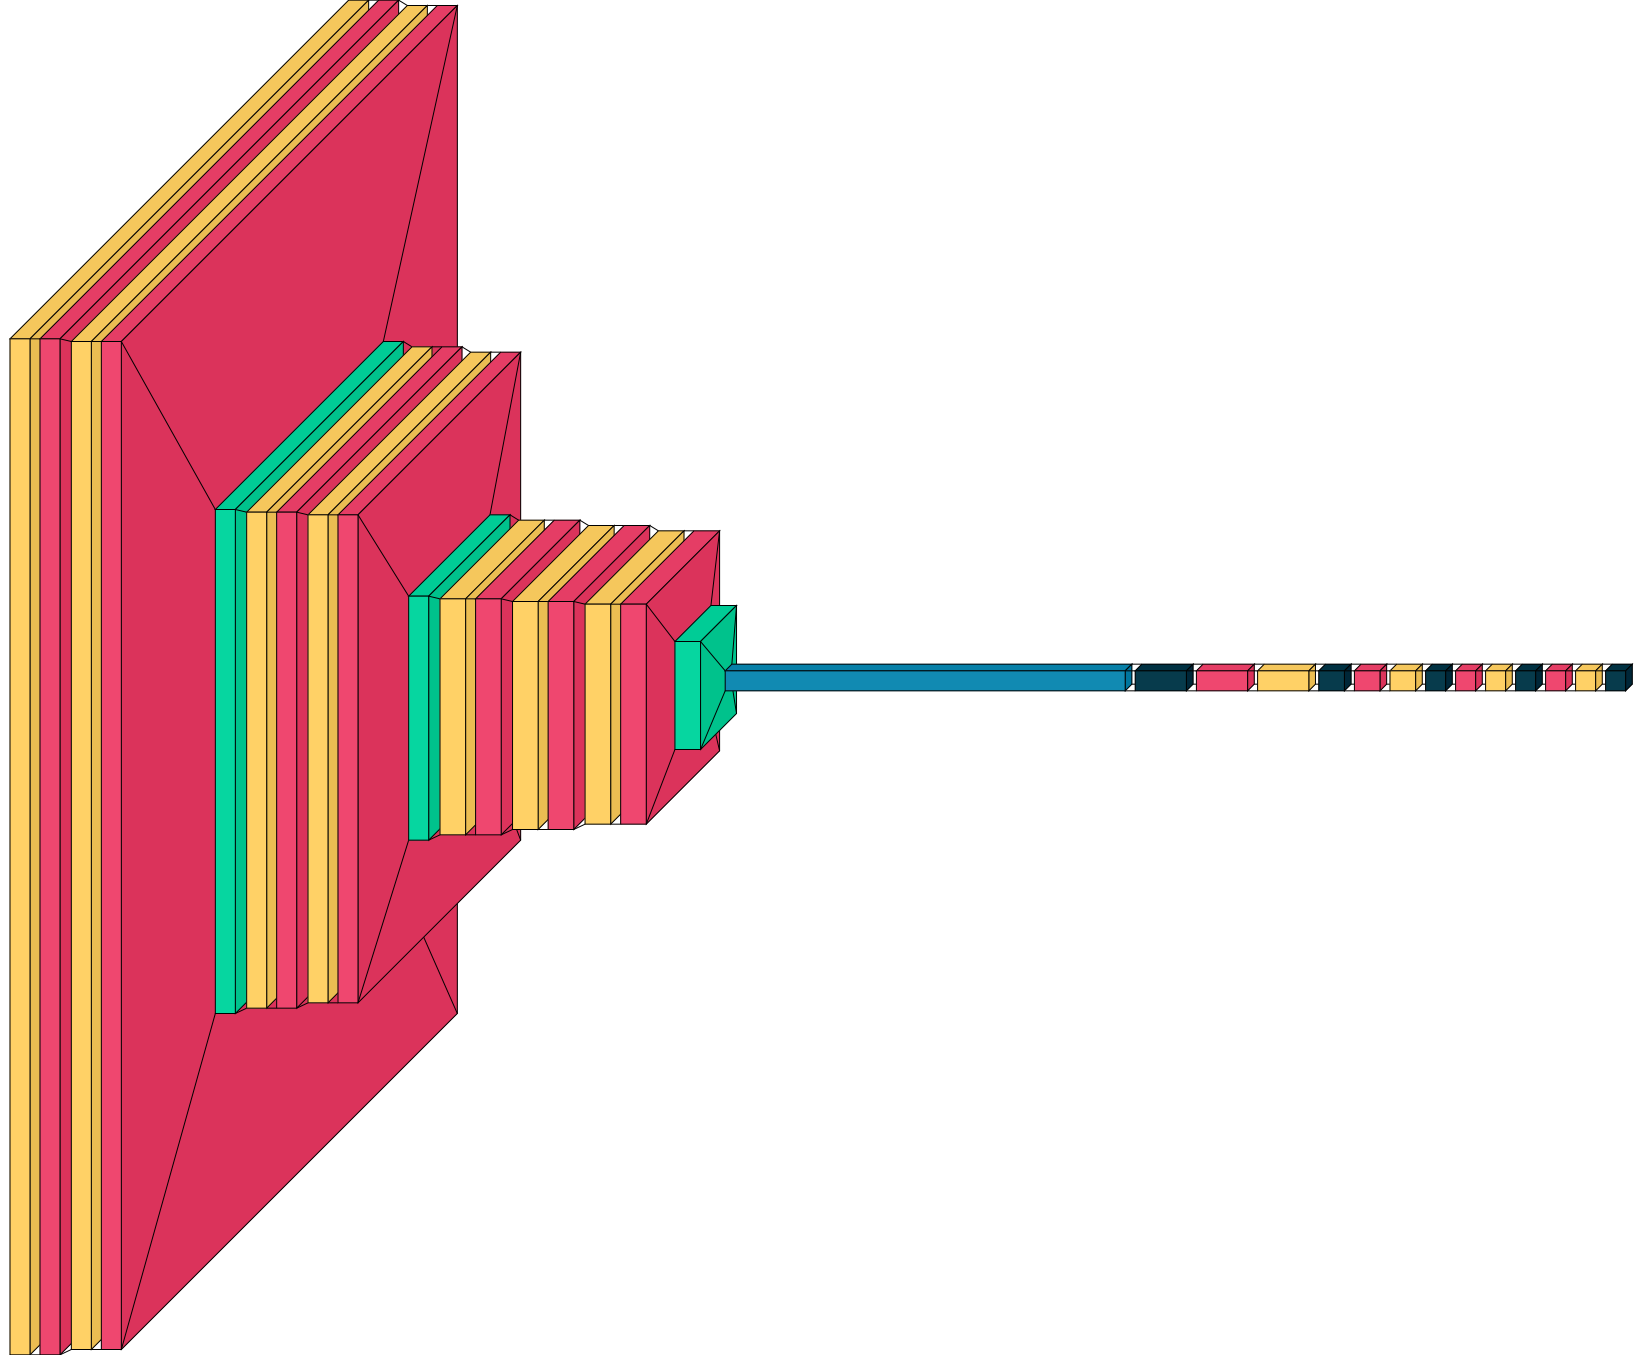

In [21]:
import visualkeras
visualkeras.layered_view(model)

In [28]:
import visualkeras



visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

AttributeError: 'ellipsis' object has no attribute 'layers'

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=50,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)



Epoch 1/10
  6/115 [>.............................] - ETA: 4:53 - loss: nan - accuracy: 0.4740WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 1.0904s vs `on_train_batch_end` time: 2.5523s). Check your callbacks.


115/115 [==============================] - 368s 3s/step - loss: nan - accuracy: 0.3468 - val_loss: nan - val_accuracy: 0.3398
Epoch 2/10
 28/115 [======>.......................] - ETA: 4:47 - loss: nan - accuracy: 0.3374

KeyboardInterrupt: 

In [29]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

AttributeError: 'ellipsis' object has no attribute 'built'

In [33]:
%tensorboard --logdir logs

## Transfer Learning

In [18]:
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras import layers
# from tensorflow.keras import Model
# import pandas as pd

# pre_trained_model = InceptionV3(input_shape=(224,224,3),
#                                 include_top=False)

# for layer in pre_trained_model.layers:
#     layer.trainable = False

# x = layers.Flatten()(pre_trained_model.output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(3, activation='softmax')(x)

# model = Model(pre_trained_model.input, x)
# model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# pd.set_option('max_colwidth', None)
# layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
# pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [20]:
train_len = 0
for foldername in os.listdir('rice_leaf_disease/train'):
    train_len = train_len + len(os.listdir(os.path.join('rice_leaf_disease/train',foldername)))

val_len = 0
for foldername in os.listdir('rice_leaf_disease/val'):
    val_len = val_len + len(os.listdir(os.path.join('rice_leaf_disease/val',foldername)))

print(train_len)

print(val_len)

3711
465


In [21]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=(train_len/32),
#     epochs=50,
#     verbose=1,
#     callbacks=[callbacks],
#     validation_data=validation_generator,
#     validation_steps=(val_len/32)
# )

## Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

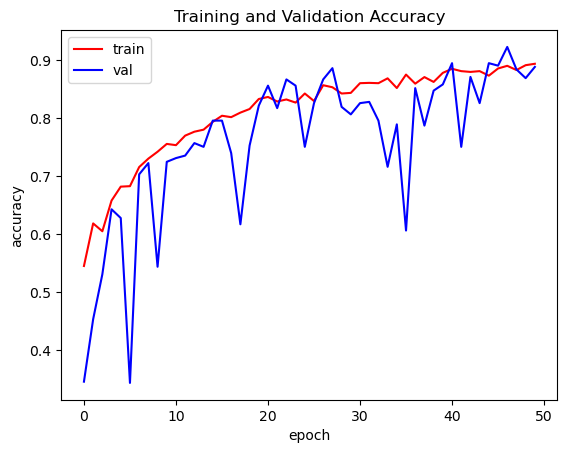

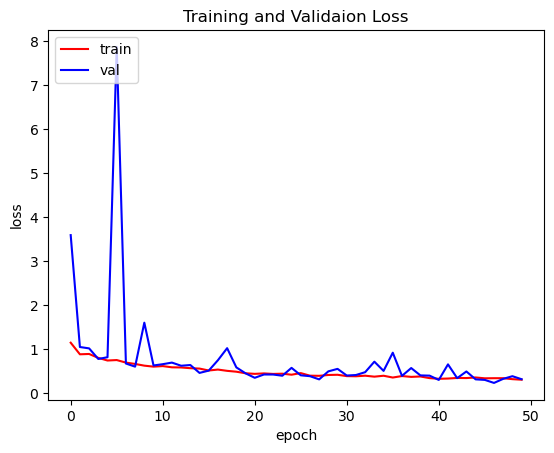

<Figure size 640x480 with 0 Axes>

In [22]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

## Evaluate Model

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(validation_dir
                                                  ,
                                                  batch_size=1,
                                                  target_size=(224, 224),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = load_model('model99.h5')
model_predict.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

loss, acc = model_predict.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 465 images belonging to 3 classes.


465/465 [==============================] - 17s 33ms/step - loss: 0.0387 - accuracy: 0.9957
accuracy test:  0.9956989288330078


In [11]:
from sklearn.metrics import classification_report

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=1,
                                                  target_size=(256, 256),
                                                  shuffle=False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

model_predict = load_model('modelcustom1.h5')
model_predict.compile(optimizer=Adam(lr=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Predict the classes for each sample
predictions = model_predict.predict_generator(test_generator, steps=nb_samples, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 465 images belonging to 3 classes.


/var/folders/wb/2gw8q4296y924dndmhykdrt40000gn/T/ipykernel_3004/4088551602.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model_predict.predict_generator(test_generator, steps=nb_samples, verbose=1)


465/465 [==============================] - 10s 22ms/step
Classification Report:
                  precision    recall  f1-score   support

Bacterialblight       0.95      0.91      0.93       158
      Brownspot       0.90      0.98      0.93       161
       Leafsmut       0.87      0.83      0.85       146

       accuracy                           0.91       465
      macro avg       0.91      0.91      0.91       465
   weighted avg       0.91      0.91      0.91       465



In [53]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report


print("==============TEST RESULTS============")
test_datagen = ImageDataGenerator(rescale=1./255)
target_names = ['Bacterialblight', 'Brownspot', 'Leafsmut']

test_generator = test_datagen.flow_from_directory(dataset_test_dir,
                                                   batch_size=1,
                                                   target_size=(256, 256),
                                                   shuffle =False,
                                                   class_mode='categorical')






Y_pred = model_predict.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

==============TEST RESULTS============
Found 465 images belonging to 3 classes.


/var/folders/wb/2gw8q4296y924dndmhykdrt40000gn/T/ipykernel_20588/1334820084.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_predict.predict_generator(test_generator)


Confusion Matrix
[[151   2   5]
 [  0 159   2]
 [  4   9 133]]
Classification Report
                 precision    recall  f1-score   support

Bacterialblight       0.97      0.96      0.96       158
      Brownspot       0.94      0.99      0.96       161
       Leafsmut       0.95      0.91      0.93       146

       accuracy                           0.95       465
      macro avg       0.95      0.95      0.95       465
   weighted avg       0.95      0.95      0.95       465



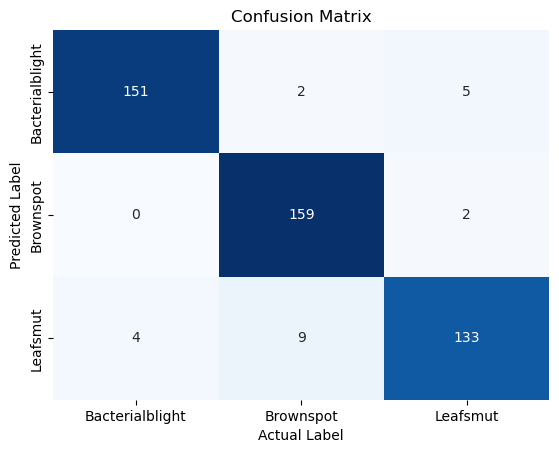

In [54]:
import seaborn as sn
from matplotlib import pyplot as plt
confmat = confusion_matrix(test_generator.classes, y_pred)
sn.heatmap(confmat, annot= True, cmap = "Blues", cbar=False, xticklabels = target_names, yticklabels = target_names , fmt = "g")
plt.title("Confusion Matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

In [25]:
model.save('modelcustom1.h5')

/Users/vashu/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predict Image

In [11]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2023-11-03 15:54:01.237831: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-03 15:54:01.237852: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-03 15:54:01.237854: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-03 15:54:01.238121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-03 15:54:01.238409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - 0s 289ms/step


2023-11-03 15:54:06.828986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


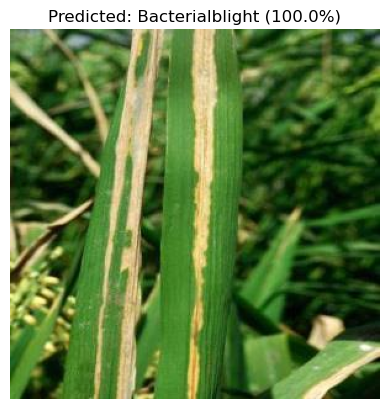

In [12]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model_predict = load_model('custom_model95.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

def predict_class(image_path):
    # Read the image from the provided path
    img = image.load_img(image_path, color_mode="rgb", target_size=(256, 256), interpolation="nearest")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Make a prediction
    classes = model_predict.predict(img_array, batch_size=10)

    # Get the predicted class and confidence
    max_confidence = np.max(classes[0])
    predicted_class_index = np.argmax(classes[0])

    classes_list = ['Bacterialblight', 'Brownspot', 'Leafsmut']
    predicted_class = classes_list[predicted_class_index]

    return predicted_class, max_confidence

# Example: Replace 'path/to/your/image.jpg' with the actual path of your image file
image_path = "/Users/vashu/Downloads/Bennett_3rd year/CSET 225 AI /project/new custom model try/rice_leaf_disease/test/Bacterialblight/BACTERAILBLIGHT5_177.JPG"
predicted_class, confidence = predict_class(image_path)

# Display the result
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
title = f"Predicted: {predicted_class} ({round(float(confidence) * 100, 2)}%)"
plt.title(title)
plt.axis('off')
plt.show()
